In [21]:
#imports
import pandas as pd
import tensorflow as tf
import matplotlib
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#reading in the data
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


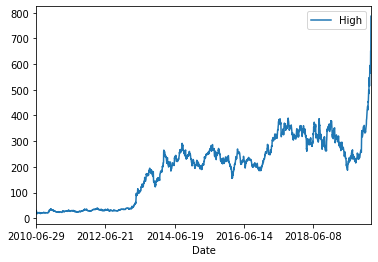

In [8]:
#visualizing what the time-series data looks like
df.plot(x="Date", y="High")

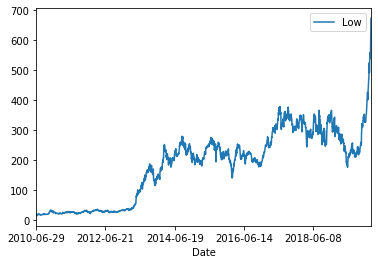

In [9]:
df.plot(x="Date", y="Low")

In [19]:
#Start by normalizing data to achieve better results - gonna start by looking/trying to predict the high
#Then will form a more sophisticated model
#turns the column of high into an array
training_set = df.iloc[:, 2:3].values
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

(2416, 1)


In [29]:
x_train = []
y_train = []
#transform data into the 3D array which will be inputted into the LSTM network
for i in range(60, 2416):
    #create data in 60 timestamps before converting it to a numpy array
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape[1])
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)

60
[[[0.01087705]
  [0.0179205 ]
  [0.01207262]
  ...
  [0.00613377]
  [0.00639368]
  [0.00561396]]

 [[0.0179205 ]
  [0.01207262]
  [0.00840795]
  ...
  [0.00639368]
  [0.00561396]
  [0.00456134]]

 [[0.01207262]
  [0.00840795]
  [0.00437941]
  ...
  [0.00561396]
  [0.00456134]
  [0.00462632]]

 ...

 [[0.38966356]
  [0.39675897]
  [0.39879924]
  ...
  [0.71189457]
  [0.72796973]
  [0.74485059]]

 [[0.39675897]
  [0.39879924]
  [0.40297072]
  ...
  [0.72796973]
  [0.74485059]
  [0.8242258 ]]

 [[0.39879924]
  [0.40297072]
  [0.42217774]
  ...
  [0.74485059]
  [0.8242258 ]
  [0.82698079]]]


In [ ]:
a = [0, 1,]